In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from urllib.request import urlopen
# we need to wrangle this HTML to extract the required data
# import BeatifulSoup to conver tag soup in HTML to useful text
from bs4 import BeautifulSoup as BS

## Writing Styles Analysis

### Basic feature extraction using text data
>Number of words
<br>Number of characters
<br>Average word length
<br>Number of stopwords, what are the included stopwords
<br>Number of numerical data and their values
<br>Number of uppercase and capitalised words








Functions to find number of sentences and words in text

In [ ]:
def article_sentlength(content):
  s_tokens = sent_tokenize(content)
  return len(s_tokens)

In [ ]:
def article_wordlength(content):
  w_tokens = word_tokenize(content)
  return len(w_tokens)

Function to calculate avg no. of words in each sentence

In [ ]:
def avg_wordcount(content):
  avg = article_wordlength(content)/article_sentlength(content)
  return avg

Function to calculate average word length in each sentence

In [ ]:
def avg_sent_word(content):
  s_tokens = sent_tokenize(content)
  for index in range(len(s_tokens)):
    char_ct = 0
    for word in s_tokens[index].split():
      char_ct+= len(word)
    print('Sentence ',index+1,': ',char_ct/len(s_tokens[index].split()))

Function to find no. of stopwords in each sentence 

In [ ]:
stop = stopwords.words('english')
def calc_stopwords(content,total_stop):
  sent_full = sent_tokenize(content)
  sent_no = 0
  for sent in sent_full:
    sent_stop =[]
    stop_ct = 0
    for word in sent.split():
      if word in stop:
        stop_ct+=1
        sent_stop.append(word)
    sent_no+=1
    total_stop+= stop_ct
    print('Sentence ',sent_no,', No. of stopwords: ',stop_ct)
    print(sent_stop)
  return total_stop

In [ ]:
def avgword_vs_stopwords(content):
  sent_full = sent_tokenize(content)
  sent_no = 0
  stopwd_dict = {}
  avg_dict = {}
  for sent in sent_full:
    stop_ct = 0
    for word in sent.split():
      if word in stop:
        stop_ct+=1
    sent_no+=1
    stopwd_dict[sent_no] = stop_ct

  for index in range(len(sent_full)):
    char_ct = 0
    for word in sent_full[index].split():
      char_ct+= len(word)
    avg = char_ct/len(sent_full[index].split())
    avg_dict[index+1] = avg 
  x1 = list(stopwd_dict.keys())
  y1 = list(stopwd_dict.values())
  x2 = list(avg_dict.keys())
  y2 = list(avg_dict.values())
  plt.plot(x1,y1,label = "stopwords")
  plt.plot(x2,y2,label = "avg.word length")
  plt.xlabel('Sentence no.')
  plt.ylabel('value')
  plt.title('Stopwords & Avg word length')
  plt.legend()
  plt.show()

Function to find any digits in any sentences, if so - how many sentences?
<br> This function will only show words that are completely digits. Words that are a combination of symbols/alphabets and digits will not be recognised by this function and this is why further processing such as removal of punctuation and/or symbols is required

In [ ]:
def find_digs(content):
  sent_full = sent_tokenize(content)
  sent_no = 0
  for sent in sent_full:
    sent_dig = re.findall(r'[0-9]+',sent)
    sent_no+=1
    if len(sent_dig)!=0:
      print('Sentence ',sent_no,' No. of numerical data: ',len(sent_dig))
      print(sent_dig)

Function to find words in uppercase - such words in texts could indicate excitement, importance or anger

In [ ]:
def uppercase(content):
  sent_full = sent_tokenize(content)
  upper = []
  caps = []
  for i in range(len(sent_full)):
    words = sent_full[i].split()
    for j in range(len(words)):
      if words[j].isupper():
        string = 'Sentence '+str(i+1)+': '+words[j]
        upper.append(string)
      if words[j][0].isupper() and words[j][1:].islower():
        string = 'Sentence '+str(i+1)+': '+words[j]
        caps.append(string)
  print('UPPERCASE')
  for item in upper:
    print(item)
  print('CAPITALISED')
  for item in caps:
    print(item)

### Hardwarezone Article #1 
<br> **Title**: Zephyr Pro gaming mouse review: Built-in fan keeps you cool

In [ ]:
url1 = 'https://www.hardwarezone.com.sg/review-zephyr-pro-gaming-mouse'
html = urlopen(url1).read()
soup = BS(html,"html5lib")
type(soup)

bs4.BeautifulSoup

In [ ]:
soup.title

<title>Zephyr Pro gaming mouse review: Built-in fan keeps you cool - HardwareZone.com.sg</title>

In [ ]:
#script.decompose testing
for script in soup(["script", "style"]):
    script.decompose()
print(' '.join(soup.stripped_strings))

Zephyr Pro gaming mouse review: Built-in fan keeps you cool - HardwareZone.com.sg Follow Us HWZ Coupons Lazada Shopee GrabFood Foodpanda Tech Shows Market Place Price Lists Forums News Reviews Videos Topics Smartphones & Tablets Networking & Telco Networking Telco Notebooks Headphones Wearables Photography Apps & Software Internet, Cloud, eCommerce Computing Desktop Systems Notebooks Input Devices Monitors Printers Storage PC Components Casings Coolers CPU Graphics Cards Memory Motherboard Power Supply Units Audio & Visual AV Systems Headphones Media Streamers and Hubs Projectors Speakers Televisions Gaming & Entertainment Culture Games & Gear Esports Toys & Collectibles Movies & Shows Smart Living & Lifestyle Smart Living Automotive Tech Science & Tech Travel & Aviation Deals Gaming Lifestyle Biz & SME Tech All Content All Content By Tag SEARCH LOGIN × Topics Smartphones & Tablets Networking & Telco Networking Telco Notebooks Headphones Wearables Photography Apps & Software Internet, 

In [ ]:
article = soup.find_all("p")
for div in article:
  print(div)

<p><em><strong>Note:</strong> This review was first published on 30 September 2021.</em></p>
<p class="rtecenter"><img alt="" src="https://assets.hardwarezone.com/img/2021/09/zephyr-pro.jpg" style="height:510px; width:800px"/></p>
<p>Last year, I reviewed a quirky prototype of a gaming mouse called the <a href="https://www.hardwarezone.com.sg/feature-zephyr-gaming-mouse-review" target="_blank">Zephyr</a>. It had a built-in fan, blowing a cool breeze against your hand to banish sweaty palms. Unfortunately, the mouse's shape didn't feel the best in hand, and the fan was noisy and buzzed frenetically when using the mouse. </p>
<p>One year later, Zephyr Gaming has rebranded to Marsback, and their new mouse, the Zephyr Pro, is here for a second shot at active cooling in a gaming mouse. The Zephyr Pro fixes a lot of the issues faced by its predecessor, and the improvements are significant.</p>
<p>It's now got a far more comfortable shape that's very similar to the <a href="https://www.hardwa

In [ ]:
# identified invalid tags and replace tags with their 
# content in each item of soup

invalid_tags = ['img','a','strong','em']
for tag in invalid_tags: 
  for match in soup.findAll(tag):
    match.replaceWithChildren()
        

In [ ]:
# extract all text with the para tag from the soup

article = soup.find_all("p")
main_content_hwz1 = []
for tag in article:
  for p_child in tag.children:
    main_content_hwz1.append(p_child)

In [ ]:
main_content_hwz1 = ' '.join(main_content_hwz1)
print(main_content_hwz1)

Note:  This review was first published on 30 September 2021. Last year, I reviewed a quirky prototype of a gaming mouse called the  Zephyr . It had a built-in fan, blowing a cool breeze against your hand to banish sweaty palms. Unfortunately, the mouse's shape didn't feel the best in hand, and the fan was noisy and buzzed frenetically when using the mouse.  One year later, Zephyr Gaming has rebranded to Marsback, and their new mouse, the Zephyr Pro, is here for a second shot at active cooling in a gaming mouse. The Zephyr Pro fixes a lot of the issues faced by its predecessor, and the improvements are significant. It's now got a far more comfortable shape that's very similar to the  Glorious Model O . With a flat profile and slight comfort grooves along the sides and mouse buttons, it feels much better in hand than the Zephyr. It is a safe, versatile shape, suitable for almost any grip style. However, the mouse is quite large, which means that certain grip styles such as the fingertip 

In [ ]:
# Number of sentences in article
print('No. of sentences in this article: ',article_sentlength(main_content_hwz1))
# Number of words in article
print('No. of words in this article: ',article_wordlength(main_content_hwz1))

No. of sentences in this article:  47
No. of words in this article:  986


In [ ]:
print('Average number of words in a sentence: ',avg_wordcount(main_content_hwz1))

Average number of words in a sentence:  20.97872340425532


In [ ]:
print('Average word length in each sentence: ')
avg_sent_word(main_content_hwz1)

Average word length in each sentence: 
Sentence  1 :  5.0
Sentence  2 :  4.266666666666667
Sentence  3 :  4.4375
Sentence  4 :  4.954545454545454
Sentence  5 :  4.413793103448276
Sentence  6 :  4.833333333333333
Sentence  7 :  4.176470588235294
Sentence  8 :  4.565217391304348
Sentence  9 :  4.583333333333333
Sentence  10 :  4.833333333333333
Sentence  11 :  4.285714285714286
Sentence  12 :  4.666666666666667
Sentence  13 :  4.476190476190476
Sentence  14 :  4.4
Sentence  15 :  5.0
Sentence  16 :  4.2272727272727275
Sentence  17 :  4.7368421052631575
Sentence  18 :  4.433333333333334
Sentence  19 :  4.333333333333333
Sentence  20 :  4.384615384615385
Sentence  21 :  4.625
Sentence  22 :  4.642857142857143
Sentence  23 :  6.0
Sentence  24 :  4.764705882352941
Sentence  25 :  4.578947368421052
Sentence  26 :  4.277777777777778
Sentence  27 :  4.8
Sentence  28 :  6.0
Sentence  29 :  4.35
Sentence  30 :  5.055555555555555
Sentence  31 :  5.45
Sentence  32 :  5.25
Sentence  33 :  3.96428571

In [ ]:
total_stop = 0
print('No. of stopwords in each sentence: ')
total_ct = calc_stopwords(main_content_hwz1,total_stop)
print('Total no of stopwords: ',total_ct)

No. of stopwords in each sentence: 
Sentence  1 , No. of stopwords:  2
['was', 'on']
Sentence  2 , No. of stopwords:  4
['a', 'of', 'a', 'the']
Sentence  3 , No. of stopwords:  6
['had', 'a', 'a', 'against', 'your', 'to']
Sentence  4 , No. of stopwords:  10
['the', "didn't", 'the', 'in', 'and', 'the', 'was', 'and', 'when', 'the']
Sentence  5 , No. of stopwords:  12
['has', 'to', 'and', 'their', 'the', 'is', 'here', 'for', 'a', 'at', 'in', 'a']
Sentence  6 , No. of stopwords:  8
['a', 'of', 'the', 'by', 'its', 'and', 'the', 'are']
Sentence  7 , No. of stopwords:  6
['now', 'a', 'more', 'very', 'to', 'the']
Sentence  8 , No. of stopwords:  8
['a', 'and', 'the', 'and', 'it', 'in', 'than', 'the']
Sentence  9 , No. of stopwords:  4
['is', 'a', 'for', 'any']
Sentence  10 , No. of stopwords:  10
['the', 'is', 'which', 'that', 'such', 'as', 'the', 'for', 'those', 'with']
Sentence  11 , No. of stopwords:  9
['its', 'down', 'to', 'and', 'it', 'a', 'more', 'than', 'the']
Sentence  12 , No. of sto

In [ ]:
# Ratio of number of stopwords to total number of words in the article
perc_stop = total_ct/article_wordlength(main_content_hwz1)
print('Percentage of total article occupied by stopwords: ',perc_stop*100)

Percentage of total article occupied by stopwords:  36.40973630831643


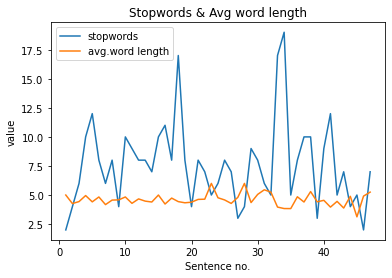

In [ ]:
avgword_vs_stopwords(main_content_hwz1)

In [ ]:
print('No. of numerical words in each sentence: ')
find_digs(main_content_hwz1)

No. of numerical words in each sentence: 
Sentence  1  No. of numerical data:  2
['30', '2021']
Sentence  11  No. of numerical data:  1
['69']
Sentence  20  No. of numerical data:  1
['50']
Sentence  27  No. of numerical data:  3
['16', '000', '3389']
Sentence  38  No. of numerical data:  1
['2021']
Sentence  39  No. of numerical data:  1
['59']
Sentence  41  No. of numerical data:  1
['59']
Sentence  43  No. of numerical data:  1
['49']


In [ ]:
print('Capitalised / Uppercase words')
uppercase(main_content_hwz1)

Capitalised / Uppercase words
UPPERCASE
Sentence 2: I
Sentence 7: O
Sentence 16: I
Sentence 24: PTFE
Sentence 27: 16,000DPI
Sentence 27: PMW3389
Sentence 29: DPI
Sentence 29: DPI
Sentence 31: DPI,
Sentence 31: RGB
Sentence 34: I
Sentence 34: I
Sentence 38: RGB
Sentence 39: US$59
Sentence 41: US$59
Sentence 43: HARDWAREZONE
Sentence 43: US$49
Sentence 47: AWARDS
Sentence 47: ACCOLADES
CAPITALISED
Sentence 1: Note:
Sentence 1: This
Sentence 1: September
Sentence 2: Last
Sentence 2: Zephyr
Sentence 3: It
Sentence 4: Unfortunately,
Sentence 5: One
Sentence 5: Zephyr
Sentence 5: Gaming
Sentence 5: Marsback,
Sentence 5: Zephyr
Sentence 5: Pro,
Sentence 6: The
Sentence 6: Zephyr
Sentence 6: Pro
Sentence 7: It's
Sentence 7: Glorious
Sentence 7: Model
Sentence 8: With
Sentence 8: Zephyr.
Sentence 9: It
Sentence 10: However,
Sentence 11: The
Sentence 11: Zephyr.
Sentence 12: Build
Sentence 13: And
Sentence 13: I'm
Sentence 14: When
Sentence 15: The
Sentence 16: This
Sentence 17: The
Sentence 18:

### Hardwarezone Article #2
<br> **Title**: Apple’s third-generation AirPods features spatial audio, longer battery life, and reimagined design (Updated)

In [ ]:
url2 = 'https://www.hardwarezone.com.sg/tech-news-apple-third-generation-airpods-3-2021-pricing-availability-singapore-pre-order'
html = urlopen(url2).read()
soup = BS(html,"html5lib")
type(soup)

bs4.BeautifulSoup

In [ ]:
soup.title

<title>Apple’s third-generation AirPods features spatial audio, longer battery life, and reimagined design (Updated) - HardwareZone.com.sg</title>

In [ ]:
print(soup)

<!DOCTYPE html>
<html lang="en" prefix="og:http://ogp.me/ns# fb:http://ogp.me/ns/fb#"><head>
	<!-- 2020 -->
	<meta content="initial-scale=1,maximum-scale=1,user-scalable=no,width=device-width" name="viewport"/>
	<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
	<link href="/manifest.json" rel="manifest"/>

	<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>	<title>Apple’s third-generation AirPods features spatial audio, longer battery life, and reimagined design (Updated) - HardwareZone.com.sg</title>

	<link href="https://www.hardwarezone.com.sg/img/icons/hwz.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="https://fonts.googleapis.com/css?family=Open+Sans+Condensed:700|Open+Sans:400,700,800" rel="stylesheet" type="text/css"/>
<link href="/css/hwzwww-2020.css?0805" rel="stylesheet" type="text/css"/>
<link href="/css/hwzwww-nav.css?0805" rel="stylesheet" type="text/css"/>
<link href="/css/nonmember-subscription.css?0805" rel="stylesheet" type=

In [ ]:
#script.decompose testing
for script in soup(["script", "style"]):
    script.decompose()
print(' '.join(soup.stripped_strings))

Apple’s third-generation AirPods features spatial audio, longer battery life, and reimagined design (Updated) - HardwareZone.com.sg Follow Us HWZ Coupons Lazada Shopee GrabFood Foodpanda Tech Shows Market Place Price Lists Forums News Reviews Videos Topics Smartphones & Tablets Networking & Telco Networking Telco Notebooks Headphones Wearables Photography Apps & Software Internet, Cloud, eCommerce Computing Desktop Systems Notebooks Input Devices Monitors Printers Storage PC Components Casings Coolers CPU Graphics Cards Memory Motherboard Power Supply Units Audio & Visual AV Systems Headphones Media Streamers and Hubs Projectors Speakers Televisions Gaming & Entertainment Culture Games & Gear Esports Toys & Collectibles Movies & Shows Smart Living & Lifestyle Smart Living Automotive Tech Science & Tech Travel & Aviation Deals Gaming Lifestyle Biz & SME Tech All Content All Content By Tag SEARCH LOGIN × Topics Smartphones & Tablets Networking & Telco Networking Telco Notebooks Headphone

In [ ]:
article = soup.find_all("p")
for div in article:
  print(div)

<p><em><strong>Note: </strong>This article was first published on 19 October 2021 and was updated on 20 October 2021 with local availability information.</em></p>
<p class="rtecenter"><img alt="Apple's third-generation AirPods." src="https://assets.hardwarezone.com/img/2021/10/apple-event-11.jpg" style="height:414px; width:650px" title="Apple's third-generation AirPods."/></p>
<p>At the 18 October 2021 Apple Event keynote earlier today, the tech firm announced its<strong> third-generation Apple AirPods</strong> (colloquially AirPods 3) true wireless earbuds. </p>
<p>In a nutshell, the new buds tap on many of Apple’s audio advances, offering features like Spatial Audio, while also improving its overall robustness with longer battery life and an improved design. </p>
<p>The third-generation AirPods comes with new contours for better fit and better funnelling of audio directly into your ears. The <strong>stem is now shorter</strong> than its predecessor, and both the earbuds and its charg

In [ ]:
# identified invalid tags and replace tags with their content in each item of soup

invalid_tags = ['img','a','strong','em','s']
for tag in invalid_tags: 
  for match in soup.findAll(tag):
    match.replaceWithChildren()
        

In [ ]:
# extract all text with the para tag from the soup

article = soup.find_all("p")#, class_="page_title")
main_content_hwz2 = []
for tag in article:
  for p_child in tag.children:
    main_content_hwz2.append(p_child)

In [ ]:
print(main_content_hwz2)

['Note: ', 'This article was first published on 19 October 2021 and was updated on 20 October 2021 with local availability information.', 'At the 18 October 2021 Apple Event keynote earlier today, the tech firm announced its', ' third-generation Apple AirPods', '\xa0(colloquially AirPods 3) true wireless earbuds.\xa0', 'In a nutshell, the new buds tap on many of Apple’s audio advances, offering features like Spatial Audio, while also improving its overall robustness with longer battery life and an improved design.\xa0', 'The third-generation AirPods comes with new contours for better fit and better funnelling of audio directly into your ears. The ', 'stem is now shorter', ' than its predecessor, and both the earbuds and its charging case now pack IPX4-certified resistance against water droplets and perspiration.', 'The custom driver in each earbud comes with a high dynamic range amplifier, covering the entire audible frequency range (from bass to high treble notes). AirPods also come w

In [ ]:
main_content_hwz2 = ' '.join(main_content_hwz2)
print(main_content_hwz2)

Note:  This article was first published on 19 October 2021 and was updated on 20 October 2021 with local availability information. At the 18 October 2021 Apple Event keynote earlier today, the tech firm announced its  third-generation Apple AirPods  (colloquially AirPods 3) true wireless earbuds.  In a nutshell, the new buds tap on many of Apple’s audio advances, offering features like Spatial Audio, while also improving its overall robustness with longer battery life and an improved design.  The third-generation AirPods comes with new contours for better fit and better funnelling of audio directly into your ears. The  stem is now shorter  than its predecessor, and both the earbuds and its charging case now pack IPX4-certified resistance against water droplets and perspiration. The custom driver in each earbud comes with a high dynamic range amplifier, covering the entire audible frequency range (from bass to high treble notes). AirPods also come with an acoustic wind filter mesh on th

In [ ]:
# Number of sentences in article
print('No. of sentences in this article: ',article_sentlength(main_content_hwz2))
# Number of words in article
print('No. of words in this article: ',article_wordlength(main_content_hwz2))

No. of sentences in this article:  25
No. of words in this article:  564


In [ ]:
print('Average number of words in a sentence: ',avg_wordcount(main_content_hwz2))

Average number of words in a sentence:  22.56


In [ ]:
print('Average word length in each sentence: ')
avg_sent_word(main_content_hwz2)

Average word length in each sentence: 
Sentence  1 :  5.190476190476191
Sentence  2 :  5.875
Sentence  3 :  5.1875
Sentence  4 :  5.526315789473684
Sentence  5 :  5.6
Sentence  6 :  5.16
Sentence  7 :  5.166666666666667
Sentence  8 :  4.6
Sentence  9 :  4.4
Sentence  10 :  4.066666666666666
Sentence  11 :  6.166666666666667
Sentence  12 :  6.333333333333333
Sentence  13 :  5.235294117647059
Sentence  14 :  5.958333333333333
Sentence  15 :  5.424242424242424
Sentence  16 :  5.7
Sentence  17 :  4.615384615384615
Sentence  18 :  4.4
Sentence  19 :  3.7222222222222223
Sentence  20 :  4.67741935483871
Sentence  21 :  3.625
Sentence  22 :  4.956521739130435
Sentence  23 :  3.9
Sentence  24 :  4.909090909090909
Sentence  25 :  5.25


In [ ]:
total_stop = 0
print('No. of stopwords in each sentence: ')
total_ct = calc_stopwords(main_content_hwz2,total_stop)
print('Total no of stopwords: ',total_ct)

No. of stopwords in each sentence: 
Sentence  1 , No. of stopwords:  6
['was', 'on', 'and', 'was', 'on', 'with']
Sentence  2 , No. of stopwords:  3
['the', 'the', 'its']
Sentence  3 , No. of stopwords:  9
['a', 'the', 'on', 'of', 'while', 'its', 'with', 'and', 'an']
Sentence  4 , No. of stopwords:  6
['with', 'for', 'and', 'of', 'into', 'your']
Sentence  5 , No. of stopwords:  12
['is', 'now', 'than', 'its', 'and', 'both', 'the', 'and', 'its', 'now', 'against', 'and']
Sentence  6 , No. of stopwords:  6
['in', 'each', 'with', 'a', 'the', 'to']
Sentence  7 , No. of stopwords:  4
['with', 'an', 'on', 'their']
Sentence  8 , No. of stopwords:  5
['to', 'the', 'now', 'a', 'for']
Sentence  9 , No. of stopwords:  3
['in', 'these', 'is']
Sentence  10 , No. of stopwords:  6
['now', 'in', 'by', 'it', 'on', 'the']
Sentence  11 , No. of stopwords:  7
['for', 'while', 'to', 'and', 'on', 'the', 'and']
Sentence  12 , No. of stopwords:  1
['a']
Sentence  13 , No. of stopwords:  5
['with', 'and', 'with'

In [ ]:
# Ratio of number of stopwords to total number of words in the article
perc_stop = total_ct/article_wordlength(main_content_hwz2)
print('Percentage of total article occupied by stopwords: ',perc_stop*100)

Percentage of total article occupied by stopwords:  25.886524822695034


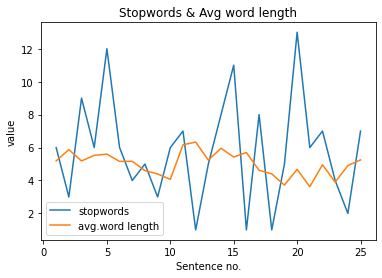

In [ ]:
avgword_vs_stopwords(main_content_hwz2)

In [ ]:
print('No. of numerical words in each sentence: ')
find_digs(main_content_hwz2)

No. of numerical words in each sentence: 
Sentence  1  No. of numerical data:  4
['19', '2021', '20', '2021']
Sentence  2  No. of numerical data:  3
['18', '2021', '3']
Sentence  5  No. of numerical data:  1
['4']
Sentence  12  No. of numerical data:  1
['3']
Sentence  17  No. of numerical data:  1
['2019']
Sentence  19  No. of numerical data:  2
['15', '15']
Sentence  20  No. of numerical data:  1
['12']
Sentence  22  No. of numerical data:  1
['269']
Sentence  23  No. of numerical data:  1
['26']


In [ ]:
print('Capitalised / Uppercase words')
uppercase(main_content_hwz2)

Capitalised / Uppercase words
UPPERCASE
Sentence 8: AAC-ELD
Sentence 8: HD
Sentence 9: EQ
Sentence 11: EQ
Sentence 12: 3D,
Sentence 20: A12
Sentence 22: S$269
Sentence 25: AWARDS
Sentence 25: ACCOLADES
CAPITALISED
Sentence 1: Note:
Sentence 1: This
Sentence 1: October
Sentence 1: October
Sentence 2: At
Sentence 2: October
Sentence 2: Apple
Sentence 2: Event
Sentence 2: Apple
Sentence 3: In
Sentence 3: Apple’s
Sentence 3: Spatial
Sentence 3: Audio,
Sentence 4: The
Sentence 5: The
Sentence 6: The
Sentence 8: According
Sentence 8: Apple,
Sentence 9: Another
Sentence 9: Adaptive
Sentence 10: The
Sentence 11: An
Sentence 11: Adaptive
Sentence 12: Spatial
Sentence 12: Apple’s
Sentence 13: It
Sentence 13: Dolby
Sentence 13: Atmos
Sentence 13: Spatial
Sentence 13: Audio
Sentence 14: Returning
Sentence 15: While
Sentence 15: Pro
Sentence 15: Apple
Sentence 16: Expectedly,
Sentence 16: Apple’s
Sentence 16: Siri
Sentence 17: Finally,
Sentence 17: Apple
Sentence 18: The
Sentence 18: Magsafe
Senten

### Channel News Asia (CNA) Article #1
<br> **Title**: Soaring prices dampen consumer mood in India's festival season



```
url3 = 'https://www.channelnewsasia.com/business/india-rising-prices-deepavali-diwali-festival-2258601'
```



In [ ]:
article1 = 'NEW DELHI: For Delhi resident Suman Milind, rising prices in India are casting a long shadow this year over the upcoming Diwali festival of lights. The 33-year-old homemaker is tightening her purse strings and altering her spending habits, thanks to soaring costs of fuel, transport and many manufactured items, coupled with stagnant incomes due to the COVID-19 pandemic. "Earlier we used to get four or five boxes of dry fruits during festivals, but now we hardly get one or two. Because of the high prices," said Milind, adding that her family has reduced spending on food too by cutting back on meat to just once a week compared to several times a week earlier. Millions of Indian households are facing similar strains on their budgets ahead of Diwali, which this year falls in early November and marks the country\'s busiest shopping season for consumer goods. Many are foregoing big-ticket purchases such as television sets and jewellery this festive season, according to half a dozen people Reuters spoke to and a consumer survey by Mumbai-based consultancy Axis My India, threatening to slow an economy recovering strongly from the worst of COVID-19. Pump prices of petrol and diesel are up nearly 35 per cent from a year ago and cooking gas by more than 50 per cent, severely hitting more than three-quarters of households, economists said. "The sky-rocketing prices of petrol, cooking gas are unbearable when our earnings are still down by nearly 30 per cent from the pre-pandemic period," said Sultan Singh Tomar, 53, who supplies incense sticks and kitchenware to shops in New Delhi on his scooter. He said his petrol bill was up by 600 rupees (US$8) from a year ago and refilling the cooking gas cylinder was costlier by 400 rupees. Tomar is among millions of people working in the informal sector who dipped into savings during the pandemic and are now forced to pare back household spending.For months India\'s consumer-price-based inflation stayed above the central-bank\'s comfort level of 6 per cent driven by a rise in food prices.In September the consumer price index eased to 4.35 per cent, helped by a softening of food prices which make up nearly half of the index. Economists said that painted a better picture than what households are actually facing.According to an October report by Axis My India on consumer spending trends, more than 88 per cent of respondents in a survey said they will not be buying air conditioners, televisions, washing machines or jewellery this festival season and nearly half said they will make low-ticket purchases such as clothes. There is not much that Prime Minister Narendra Modi\'s government can do to alleviate the pain as global crude oil prices hit a three-year high at US$85 a barrel, piling up the pressure on a country that imports 80 per cent of its oil.Bidisha Ganguly, chief economist at industry chamber, Confederation of Indian Industries, said federal and state governments should cut fuel taxes, the highest among the major economies, as higher fuel prices posed a risk of building up of medium term inflationary pressures."(Otherwise) corporate earnings will be impacted in sectors where producers are unable to pass on the cost increases," she said, adding global shortages were already driving up commodity costs for many products.REDUCED FOOTFALLS Private economists have warned that annual wholesale-price-based inflation - a proxy for producers\' prices - staying in double digits for sixth months in a row could further fuel inflationary pressures as companies pass on rising costs to consumers.Already some retailers said rising raw material costs were impacting their sales."Our sales are not even half of what we used to have during the festival period," said Kawaljit Singh, who sells utensils from a shop in Chandani Chowk in the old quarter of Delhi.He said a rise in prices of metals like steel and copper had pushed up prices of utensils, cookers, festival lighting and gift items by 15 per cent to 20 per cent in the last four to five months.Because of rising prices and other market uncertainties, Delhi-based company auditor Lalit Vats said his family had downgraded to non-branded products and visited the wholesale markets to hunt for bargains. \"Government can talk about easing of inflation, but people know that costs of every item has gone up,\" lamented his mother Anita Vats.Source: Reuters/ng'

In [ ]:
sentences = sent_tokenize(article1)
for sent in sentences:
  print(sent)

NEW DELHI: For Delhi resident Suman Milind, rising prices in India are casting a long shadow this year over the upcoming Diwali festival of lights.
The 33-year-old homemaker is tightening her purse strings and altering her spending habits, thanks to soaring costs of fuel, transport and many manufactured items, coupled with stagnant incomes due to the COVID-19 pandemic.
"Earlier we used to get four or five boxes of dry fruits during festivals, but now we hardly get one or two.
Because of the high prices," said Milind, adding that her family has reduced spending on food too by cutting back on meat to just once a week compared to several times a week earlier.
Millions of Indian households are facing similar strains on their budgets ahead of Diwali, which this year falls in early November and marks the country's busiest shopping season for consumer goods.
Many are foregoing big-ticket purchases such as television sets and jewellery this festive season, according to half a dozen people Reut

In [ ]:
# Number of sentences in article
print('No. of sentences in this article: ',article_sentlength(article1))
# Number of words in article
print('No. of words in this article: ',article_wordlength(article1))

No. of sentences in this article:  15
No. of words in this article:  794


In [ ]:
print('Average number of words in a sentence: ',avg_wordcount(article1))

Average number of words in a sentence:  52.93333333333333


In [ ]:
print('Average word length in each sentence: ')
avg_sent_word(article1)

Average word length in each sentence: 
Sentence  1 :  4.92
Sentence  2 :  5.787878787878788
Sentence  3 :  3.9545454545454546
Sentence  4 :  4.411764705882353
Sentence  5 :  5.419354838709677
Sentence  6 :  5.511111111111111
Sentence  7 :  4.617647058823529
Sentence  8 :  5.069767441860465
Sentence  9 :  4.1923076923076925
Sentence  10 :  5.041095890410959
Sentence  11 :  5.317460317460317
Sentence  12 :  5.071428571428571
Sentence  13 :  5.829268292682927
Sentence  14 :  4.762376237623762
Sentence  15 :  5.375


In [ ]:
total_stop = 0
print('No. of stopwords in each sentence: ')
total_ct = calc_stopwords(article1,total_stop)
print('Total no of stopwords: ',total_ct)

No. of stopwords in each sentence: 
Sentence  1 , No. of stopwords:  7
['in', 'are', 'a', 'this', 'over', 'the', 'of']
Sentence  2 , No. of stopwords:  10
['is', 'her', 'and', 'her', 'to', 'of', 'and', 'with', 'to', 'the']
Sentence  3 , No. of stopwords:  9
['we', 'to', 'or', 'of', 'during', 'but', 'now', 'we', 'or']
Sentence  4 , No. of stopwords:  15
['of', 'the', 'that', 'her', 'has', 'on', 'too', 'by', 'on', 'to', 'just', 'once', 'a', 'to', 'a']
Sentence  5 , No. of stopwords:  11
['of', 'are', 'on', 'their', 'of', 'which', 'this', 'in', 'and', 'the', 'for']
Sentence  6 , No. of stopwords:  16
['are', 'such', 'as', 'and', 'this', 'to', 'a', 'to', 'and', 'a', 'by', 'to', 'an', 'from', 'the', 'of']
Sentence  7 , No. of stopwords:  13
['of', 'and', 'are', 'up', 'from', 'a', 'and', 'by', 'more', 'than', 'more', 'than', 'of']
Sentence  8 , No. of stopwords:  15
['of', 'are', 'when', 'our', 'are', 'down', 'by', 'from', 'the', 'who', 'and', 'to', 'in', 'on', 'his']
Sentence  9 , No. of st

In [ ]:
# Ratio of number of stopwords to total number of words in the article
perc_stop = total_ct/article_wordlength(article1)
print('Percentage of total article occupied by stopwords: ',perc_stop*100)

Percentage of total article occupied by stopwords:  32.87153652392947


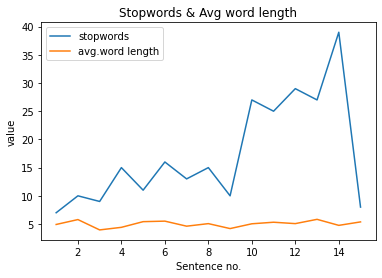

In [ ]:
avgword_vs_stopwords(article1)

In [ ]:
print('No. of numerical words in each sentence: ')
find_digs(article1)

No. of numerical words in each sentence: 
Sentence  2  No. of numerical data:  2
['33', '19']
Sentence  6  No. of numerical data:  1
['19']
Sentence  7  No. of numerical data:  2
['35', '50']
Sentence  8  No. of numerical data:  2
['30', '53']
Sentence  9  No. of numerical data:  3
['600', '8', '400']
Sentence  10  No. of numerical data:  3
['6', '4', '35']
Sentence  11  No. of numerical data:  1
['88']
Sentence  12  No. of numerical data:  2
['85', '80']
Sentence  14  No. of numerical data:  2
['15', '20']


In news articles, fully capitalised words are usually found as titles, subheadings or abbreviations
<br> Words that have been capitalised are most likely to be proper nouns, apart from sentence beginnings

In [ ]:
print('Capitalised / Uppercase words')
uppercase(article1)

Capitalised / Uppercase words
UPPERCASE
Sentence 1: NEW
Sentence 1: DELHI:
Sentence 2: COVID-19
Sentence 6: COVID-19.
Sentence 9: (US$8)
Sentence 12: US$85
Sentence 13: FOOTFALLS
CAPITALISED
Sentence 1: For
Sentence 1: Delhi
Sentence 1: Suman
Sentence 1: Milind,
Sentence 1: India
Sentence 1: Diwali
Sentence 2: The
Sentence 4: Because
Sentence 4: Milind,
Sentence 5: Millions
Sentence 5: Indian
Sentence 5: Diwali,
Sentence 5: November
Sentence 6: Many
Sentence 6: Reuters
Sentence 6: Mumbai-based
Sentence 6: Axis
Sentence 6: My
Sentence 6: India,
Sentence 7: Pump
Sentence 8: Sultan
Sentence 8: Singh
Sentence 8: Tomar,
Sentence 8: New
Sentence 8: Delhi
Sentence 9: He
Sentence 10: Tomar
Sentence 10: India's
Sentence 10: September
Sentence 11: Economists
Sentence 11: October
Sentence 11: Axis
Sentence 11: My
Sentence 11: India
Sentence 12: There
Sentence 12: Prime
Sentence 12: Minister
Sentence 12: Narendra
Sentence 12: Modi's
Sentence 12: Ganguly,
Sentence 12: Confederation
Sentence 12: Ind

### Channel News Asia (CNA) Article #2
<br> **Title**: Only fully vaccinated employees can return to workplaces from Jan 1; others must test negative




```
url4 = 'https://www.channelnewsasia.com/singapore/only-fully-vaccinated-employees-can-return-workplace-unvaccinated-test-negative-2263807'
```



In [ ]:
article2 = ('SINGAPORE: From Jan 1, only employees who are fully vaccinated against COVID-19 or have recovered from the disease within the past 270 days will be allowed to return to workplaces, the Ministry of Health (MOH) said on Saturday (Oct 23). Unvaccinated employees will not be allowed to return to their workplaces unless they have tested negative for COVID-19. These employees will bear the costs of testing.The tests should be administered at MOH-approved providers and must be valid for the duration that the employees are required to be at their workplaces. Negative antigen rapid test results are valid for 24 hours. MOH and the Ministry of Manpower will provide more details later, along with a tripartite advisory on vaccination at the workplace.MOH considers individuals to be fully vaccinated if they have received the appropriate regimen of vaccines under the World Health Organization emergency use listing. This includes the duration post-vaccination for the vaccine to be fully effective. Their vaccination records must have been added to the ministry\'s systems. SPECIAL CONCESSION FOR THOSE MEDICALLY INELIGIBLE FOR VACCINES. On Saturday, MOH also announced that people who are medically ineligible for all vaccines under the national vaccination programme will be exempted from vaccination-differentiated measures. \"We will give special concession for them to enter premises or participate in activities where the vaccination-differentiated safe management systems are required, such as shopping malls, attractions, hawker centres and coffee shops, starting from Nov 1, 2021,\” said co-chair of the COVID-19 task force Gan Kim Yong at a news conference.\“For those who are medically ineligible for mRNA vaccines but are eligible for Sinovac, they will need to be vaccinated with Sinovac to be considered to be fully vaccinated.\” Mr Gan added that such individuals will be given a grace period until Dec 31 to get their Sinovac shots.It was announced earlier in the news conference that the Sinovac COVID-19 vaccine will be included in Singapore\’s national vaccination programme. ACTIVITIES FOR SENIORS. Fully vaccinated seniors can look forward to participating in \“safe and healthy activities\” that will help them maintain their physical and mental wellness, MOH said on Saturday. \“Over the past months, the options for seniors to be socially engaged in wellness activities have been limited, as a result of safe management measures which had to be imposed to curb transmission of COVID-19,\” said the ministry. \“Keeping active is important for our seniors to maintain good physical and mental health. Hence, the People\’s Association will organise activities for fully vaccinated seniors according to prevailing safe management measures.\” Mr Gan said that activities may include physical exercises like qigong, outings and learning journeys.')

In [ ]:
sentences = sent_tokenize(article2)
for sent in sentences:
  print(sent)

SINGAPORE: From Jan 1, only employees who are fully vaccinated against COVID-19 or have recovered from the disease within the past 270 days will be allowed to return to workplaces, the Ministry of Health (MOH) said on Saturday (Oct 23).
Unvaccinated employees will not be allowed to return to their workplaces unless they have tested negative for COVID-19.
These employees will bear the costs of testing.The tests should be administered at MOH-approved providers and must be valid for the duration that the employees are required to be at their workplaces.
Negative antigen rapid test results are valid for 24 hours.
MOH and the Ministry of Manpower will provide more details later, along with a tripartite advisory on vaccination at the workplace.MOH considers individuals to be fully vaccinated if they have received the appropriate regimen of vaccines under the World Health Organization emergency use listing.
This includes the duration post-vaccination for the vaccine to be fully effective.
The

In [ ]:
# Number of sentences in article
print('No. of sentences in this article: ',article_sentlength(article2))
# Number of words in article
print('No. of words in this article: ',article_wordlength(article2))

No. of sentences in this article:  15
No. of words in this article:  491


In [ ]:
print('Average number of words in a sentence: ',avg_wordcount(article2))

Average number of words in a sentence:  32.733333333333334


In [ ]:
print('Average word length in each sentence: ')
avg_sent_word(article2)

Average word length in each sentence: 
Sentence  1 :  4.925
Sentence  2 :  5.666666666666667
Sentence  3 :  5.25
Sentence  4 :  5.0
Sentence  5 :  5.75
Sentence  6 :  5.916666666666667
Sentence  7 :  5.7272727272727275
Sentence  8 :  7.0
Sentence  9 :  6.6
Sentence  10 :  5.436974789915967
Sentence  11 :  7.0
Sentence  12 :  5.703703703703703
Sentence  13 :  5.105263157894737
Sentence  14 :  5.5
Sentence  15 :  6.5625


In [ ]:
total_stop = 0
print('No. of stopwords in each sentence: ')
total_ct = calc_stopwords(article2,total_stop)
print('Total no of stopwords: ',total_ct)

No. of stopwords in each sentence: 
Sentence  1 , No. of stopwords:  16
['only', 'who', 'are', 'against', 'or', 'have', 'from', 'the', 'the', 'will', 'be', 'to', 'to', 'the', 'of', 'on']
Sentence  2 , No. of stopwords:  9
['will', 'not', 'be', 'to', 'to', 'their', 'they', 'have', 'for']
Sentence  3 , No. of stopwords:  17
['will', 'the', 'of', 'should', 'be', 'at', 'and', 'be', 'for', 'the', 'that', 'the', 'are', 'to', 'be', 'at', 'their']
Sentence  4 , No. of stopwords:  2
['are', 'for']
Sentence  5 , No. of stopwords:  19
['and', 'the', 'of', 'will', 'more', 'with', 'a', 'on', 'at', 'the', 'to', 'be', 'if', 'they', 'have', 'the', 'of', 'under', 'the']
Sentence  6 , No. of stopwords:  5
['the', 'for', 'the', 'to', 'be']
Sentence  7 , No. of stopwords:  4
['have', 'been', 'to', 'the']
Sentence  8 , No. of stopwords:  0
[]
Sentence  9 , No. of stopwords:  10
['that', 'who', 'are', 'for', 'all', 'under', 'the', 'will', 'be', 'from']
Sentence  10 , No. of stopwords:  49
['will', 'for', 't

In [ ]:
# Ratio of number of stopwords to total number of words in the article
perc_stop = total_ct/article_wordlength(article2)
print('Percentage of total article occupied by stopwords: ',perc_stop*100)

Percentage of total article occupied by stopwords:  34.623217922606926


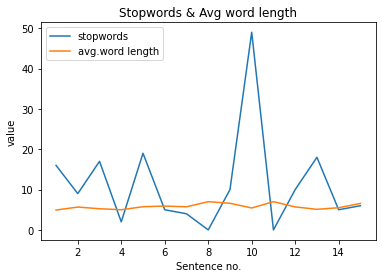

In [ ]:
avgword_vs_stopwords(article2)

In [ ]:
print('No. of numerical words in each sentence: ')
find_digs(article2)

No. of numerical words in each sentence: 
Sentence  1  No. of numerical data:  4
['1', '19', '270', '23']
Sentence  2  No. of numerical data:  1
['19']
Sentence  4  No. of numerical data:  1
['24']
Sentence  10  No. of numerical data:  5
['1', '2021', '19', '31', '19']
Sentence  13  No. of numerical data:  1
['19']


In news articles, fully capitalised words are usually found as titles, subheadings or abbreviations
<br> Words that have been capitalised are most likely to be proper nouns, apart from sentence beginnings

In [ ]:
print('Capitalised / Uppercase words')
uppercase(article2)

Capitalised / Uppercase words
UPPERCASE
Sentence 1: SINGAPORE:
Sentence 1: COVID-19
Sentence 1: (MOH)
Sentence 2: COVID-19.
Sentence 5: MOH
Sentence 8: SPECIAL
Sentence 8: CONCESSION
Sentence 8: FOR
Sentence 8: THOSE
Sentence 8: MEDICALLY
Sentence 8: INELIGIBLE
Sentence 8: FOR
Sentence 8: VACCINES.
Sentence 9: MOH
Sentence 10: COVID-19
Sentence 10: COVID-19
Sentence 11: ACTIVITIES
Sentence 11: FOR
Sentence 11: SENIORS.
Sentence 12: MOH
Sentence 13: COVID-19,\”
CAPITALISED
Sentence 1: From
Sentence 1: Jan
Sentence 1: Ministry
Sentence 1: Health
Sentence 1: Saturday
Sentence 2: Unvaccinated
Sentence 3: These
Sentence 4: Negative
Sentence 5: Ministry
Sentence 5: Manpower
Sentence 5: World
Sentence 5: Health
Sentence 5: Organization
Sentence 6: This
Sentence 7: Their
Sentence 9: On
Sentence 9: Saturday,
Sentence 10: Nov
Sentence 10: Gan
Sentence 10: Kim
Sentence 10: Yong
Sentence 10: Sinovac,
Sentence 10: Sinovac
Sentence 10: Mr
Sentence 10: Gan
Sentence 10: Dec
Sentence 10: Sinovac
Senten

### Stack Overflow Article #1
<br> **Title**: I'm getting Key error in Python

In [ ]:
url3 = 'https://stackoverflow.com/questions/10116518/im-getting-key-error-in-python'
html = urlopen(url3).read()
soup = BS(html,"html5lib")
type(soup)

bs4.BeautifulSoup

In [ ]:
soup.title

<title>dictionary - I'm getting Key error in python - Stack Overflow</title>

In [ ]:
#script.decompose testing
for script in soup(["script", "style"]):
    script.decompose()
print(' '.join(soup.stripped_strings))

dictionary - I'm getting Key error in python - Stack Overflow Stack Overflow About Products For Teams Stack Overflow Public questions & answers Stack Overflow for Teams Where developers & technologists share private knowledge with coworkers Jobs Programming & related technical career opportunities Talent Recruit tech talent & build your employer brand Advertising Reach developers & technologists worldwide About the company Loading… Log in Sign up current community Stack Overflow help chat Meta Stack Overflow your communities Sign up or log in to customize your list. more stack exchange communities company blog Home Public Questions Tags Users Collectives Explore Collectives Find a Job Jobs Companies Teams Stack Overflow for Teams – Collaborate and share knowledge with a private group. Create a free Team What is Teams? Teams Create free Team Collectives on Stack Overflow Find centralized, trusted content and collaborate around the technologies you use most. Learn more Teams Q&A for work

In [ ]:
article = soup.find_all("p")
for div in article:
  print(div)

<p class="my16 fs-caption fc-medium">Find centralized, trusted content and collaborate around the technologies you use most.</p>
<p class="mb2"><strong>Teams</strong></p>
<p class="mb12 fs-caption fc-black-400">Q&amp;A for work</p>
<p class="mb12 fs-caption fc-medium">Connect and share knowledge within a single location that is structured and easy to search.</p>
<p>In my python program I am getting this error:</p>
<p>From this code:</p>
<p>Can anyone please explain why this is happening?</p>
<p>A <a href="https://docs.python.org/library/exceptions.html#KeyError" rel="noreferrer"><code>KeyError</code></a> generally means the key doesn't exist. So, are you sure the <code>path</code> key exists?</p>
<p>From the official python docs:</p>
<p><strong>exception KeyError</strong></p>
<p>Raised when a mapping (dictionary) key is not found in the set of
  existing keys.</p>
<p>For example:</p>
<p>So, try to print the content of <code>meta_entry</code> and check whether <code>path</code> exists o

In [ ]:
# getting the code embedded into the article using the code tags

code = soup.findAll('code')     
print(code)   

[<code>KeyError: 'variablename'
</code>, <code>path = meta_entry['path'].strip('/'),
</code>, <code>Key error</code>, <code>key</code>, <code>meta_entry</code>, <code>KeyError</code>, <code>path</code>, <code>&gt;&gt;&gt; mydict = {'a':'1','b':'2'}
&gt;&gt;&gt; mydict['a']
'1'
&gt;&gt;&gt; mydict['c']
Traceback (most recent call last):
  File "&lt;stdin&gt;", line 1, in &lt;module&gt;
KeyError: 'c'
&gt;&gt;&gt;
</code>, <code>meta_entry</code>, <code>path</code>, <code>&gt;&gt;&gt; mydict = {'a':'1','b':'2'}
&gt;&gt;&gt; print mydict
{'a': '1', 'b': '2'}
</code>, <code>&gt;&gt;&gt; 'a' in mydict
True
&gt;&gt;&gt; 'c' in mydict
False
</code>, <code>path = meta_entry['path'].strip('/'),</code>, <code>print meta_entry</code>, <code>path</code>, <code>None</code>, <code>&gt;&gt;&gt; d = {"a":1, "b":2}
&gt;&gt;&gt; x = d.get("A",None)
&gt;&gt;&gt; print x
None
</code>, <code>if key in dict</code>, <code>if key in dict.keys()</code>, <code>&gt;&gt;&gt;'a' in mydict.keys()  
</code>, <code>ge

In [ ]:
invalid_tags = ['img','a','strong','em','code','input','span']
for tag in invalid_tags: 
  for match in soup.findAll(tag):
    match.replaceWithChildren()

In [ ]:
article = soup.find_all("p")
stack_over1 = []
for tag in article:
  for p_child in tag.children:
    stack_over1.append(p_child)

In [ ]:
print(stack_over1)

['Find centralized, trusted content and collaborate around the technologies you use most.', 'Teams', 'Q&A for work', 'Connect and share knowledge within a single location that is structured and easy to search.', 'In my python program I am getting this error:', 'From this code:', 'Can anyone please explain why this is happening?', 'A ', 'KeyError', " generally means the key doesn't exist. So, are you sure the ", 'path', ' key exists?', 'From the official python docs:', 'exception KeyError', 'Raised when a mapping (dictionary) key is not found in the set of\n  existing keys.', 'For example:', 'So, try to print the content of ', 'meta_entry', ' and check whether ', 'path', ' exists or not.', 'Or, you can do:', 'I fully agree with the Key error comments.  You could also use the ', "dictionary's get()", ' method as well to avoid the exceptions.  This could also be used to give a default path rather than ', 'None', ' as shown below.', 'For dict, just use', 'if key in dict', "and don't use se

In [ ]:
stack_over1 = ' '.join(stack_over1)
print(stack_over1)

Find centralized, trusted content and collaborate around the technologies you use most. Teams Q&A for work Connect and share knowledge within a single location that is structured and easy to search. In my python program I am getting this error: From this code: Can anyone please explain why this is happening? A  KeyError  generally means the key doesn't exist. So, are you sure the  path  key exists? From the official python docs: exception KeyError Raised when a mapping (dictionary) key is not found in the set of
  existing keys. For example: So, try to print the content of  meta_entry  and check whether  path  exists or not. Or, you can do: I fully agree with the Key error comments.  You could also use the  dictionary's get()  method as well to avoid the exceptions.  This could also be used to give a default path rather than  None  as shown below. For dict, just use if key in dict and don't use searching in key list if key in dict.keys() The latter will be more time-consuming. Yes, it 

In [ ]:
# Number of sentences in article
print('No. of sentences in this article: ',article_sentlength(stack_over1))
# Number of words in article
print('No. of words in this article: ',article_wordlength(stack_over1))

No. of sentences in this article:  25
No. of words in this article:  555


In [ ]:
print('Average number of words in a sentence: ',avg_wordcount(stack_over1))

Average number of words in a sentence:  22.2


In [ ]:
print('Average word length in each sentence: ')
avg_sent_word(stack_over1)

Average word length in each sentence: 
Sentence  1 :  6.333333333333333
Sentence  2 :  4.842105263157895
Sentence  3 :  4.55
Sentence  4 :  5.25
Sentence  5 :  3.75
Sentence  6 :  4.954545454545454
Sentence  7 :  4.529411764705882
Sentence  8 :  3.9166666666666665
Sentence  9 :  4.857142857142857
Sentence  10 :  4.0
Sentence  11 :  4.28
Sentence  12 :  4.777777777777778
Sentence  13 :  4.923076923076923
Sentence  14 :  3.923076923076923
Sentence  15 :  3.75
Sentence  16 :  4.75
Sentence  17 :  3.7
Sentence  18 :  4.545454545454546
Sentence  19 :  4.380952380952381
Sentence  20 :  4.406976744186046
Sentence  21 :  4.571428571428571
Sentence  22 :  3.7857142857142856
Sentence  23 :  4.609756097560975
Sentence  24 :  4.6875
Sentence  25 :  5.551724137931035


In [ ]:
total_stop = 0
print('No. of stopwords in each sentence: ')
total_ct = calc_stopwords(stack_over1,total_stop)
print('Total no of stopwords: ',total_ct)

No. of stopwords in each sentence: 
Sentence  1 , No. of stopwords:  3
['and', 'the', 'you']
Sentence  2 , No. of stopwords:  7
['for', 'and', 'a', 'that', 'is', 'and', 'to']
Sentence  3 , No. of stopwords:  7
['my', 'am', 'this', 'this', 'why', 'this', 'is']
Sentence  4 , No. of stopwords:  2
['the', "doesn't"]
Sentence  5 , No. of stopwords:  3
['are', 'you', 'the']
Sentence  6 , No. of stopwords:  8
['the', 'when', 'a', 'is', 'not', 'in', 'the', 'of']
Sentence  7 , No. of stopwords:  5
['to', 'the', 'of', 'and', 'or']
Sentence  8 , No. of stopwords:  4
['you', 'can', 'with', 'the']
Sentence  9 , No. of stopwords:  4
['the', 'as', 'to', 'the']
Sentence  10 , No. of stopwords:  5
['be', 'to', 'a', 'than', 'as']
Sentence  11 , No. of stopwords:  11
['just', 'if', 'in', 'and', "don't", 'in', 'if', 'in', 'will', 'be', 'more']
Sentence  12 , No. of stopwords:  4
['it', 'is', 'most', 'by']
Sentence  13 , No. of stopwords:  4
['my', 'to', 'this', 'for']
Sentence  14 , No. of stopwords:  6
[

In [ ]:
# Ratio of number of stopwords to total number of words in the article
perc_stop = total_ct/article_wordlength(stack_over1)
print('Percentage of total article occupied by stopwords: ',perc_stop*100)

Percentage of total article occupied by stopwords:  29.549549549549546


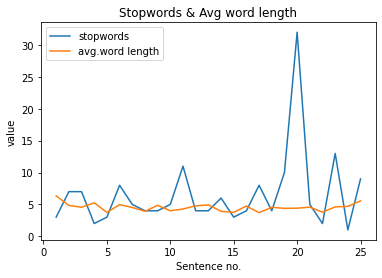

In [ ]:
avgword_vs_stopwords(stack_over1)

In [ ]:
print('No. of numerical words in each sentence: ')
find_digs(stack_over1)

No. of numerical words in each sentence: 
Sentence  17  No. of numerical data:  1
['3']
Sentence  20  No. of numerical data:  2
['3', '1']
Sentence  24  No. of numerical data:  1
['2021']
Sentence  25  No. of numerical data:  4
['2021', '10', '22', '40552']


In [ ]:
print('Capitalised / Uppercase words')
uppercase(stack_over1)

Capitalised / Uppercase words
UPPERCASE
Sentence 2: Q&A
Sentence 3: I
Sentence 4: A
Sentence 8: I
Sentence 13: I
Sentence 14: I
Sentence 15: I
Sentence 19: I
Sentence 20: I
Sentence 20: I
Sentence 23: RSS
Sentence 23: URL
Sentence 23: RSS
CAPITALISED
Sentence 1: Find
Sentence 2: Teams
Sentence 2: Connect
Sentence 3: In
Sentence 3: From
Sentence 3: Can
Sentence 5: So,
Sentence 6: From
Sentence 6: Raised
Sentence 7: For
Sentence 7: So,
Sentence 8: Or,
Sentence 8: Key
Sentence 9: You
Sentence 10: This
Sentence 10: None
Sentence 11: For
Sentence 11: The
Sentence 12: Yes,
Sentence 13: In
Sentence 14: Python
Sentence 15: In
Sentence 16: So
Sentence 17: In
Sentence 17: Python
Sentence 17: It
Sentence 18: This
Sentence 20: Output:
Sentence 20: Traceback:
Sentence 20: Because
Sentence 20: So:
Sentence 20: Gives
Sentence 20: Let
Sentence 20: Python
Sentence 20: If
Sentence 20: For
Sentence 20: For
Sentence 20: It's
Sentence 21: So
Sentence 21: Thanks
Sentence 21: Stack
Sentence 21: Overflow!
Sen

### Stack Overflow Article #2
<br> **Title**: python - beautifulsoup - TypeError: sequence item 0: expected string, Tag found

In [ ]:
url4 = 'https://stackoverflow.com/questions/14264102/python-beautifulsoup-typeerror-sequence-item-0-expected-string-tag-found'
html = urlopen(url4).read()
soup = BS(html,"html5lib")
type(soup)

bs4.BeautifulSoup

In [ ]:
soup.title

<title>python - beautifulsoup - TypeError: sequence item 0: expected string, Tag found - Stack Overflow</title>

In [ ]:
#script.decompose testing
for script in soup(["script", "style"]):
    script.decompose()
print(' '.join(soup.stripped_strings))

python - beautifulsoup - TypeError: sequence item 0: expected string, Tag found - Stack Overflow Stack Overflow About Products For Teams Stack Overflow Public questions & answers Stack Overflow for Teams Where developers & technologists share private knowledge with coworkers Jobs Programming & related technical career opportunities Talent Recruit tech talent & build your employer brand Advertising Reach developers & technologists worldwide About the company Loading… Log in Sign up current community Stack Overflow help chat Meta Stack Overflow your communities Sign up or log in to customize your list. more stack exchange communities company blog Home Public Questions Tags Users Collectives Explore Collectives Find a Job Jobs Companies Teams Stack Overflow for Teams – Collaborate and share knowledge with a private group. Create a free Team What is Teams? Teams Create free Team Collectives on Stack Overflow Find centralized, trusted content and collaborate around the technologies you use 

In [ ]:
article = soup.find_all("p")#, class_="page_title")
for div in article:
  print(div)

<p class="my16 fs-caption fc-medium">Find centralized, trusted content and collaborate around the technologies you use most.</p>
<p class="mb2"><strong>Teams</strong></p>
<p class="mb12 fs-caption fc-black-400">Q&amp;A for work</p>
<p class="mb12 fs-caption fc-medium">Connect and share knowledge within a single location that is structured and easy to search.</p>
<p>I'm using beautifulsoup to extract images and links from a html string. It all works perfectly fine, however with some links that have a tag in the link contents it is throwing an error.</p>
<p>Example Link:</p>
<p>Python Code:</p>
<p>Error Message:</p>
<p>I don't really want to have to loop through any child tags in the link text, I simply want to return the raw contents, is this possible with BS?</p>
<p>To grab just the text content of a tag, the <a href="http://www.crummy.com/software/BeautifulSoup/bs4/doc/#get-text" rel="noreferrer"><code>element.get_text()</code> method</a> lets you grab (stripped) text from the current

In [ ]:
# getting the code embedded into the article
code = soup.findAll('code')     
print(code)   

[<code>&lt;a href="http://www.example.com"&gt;&lt;strong&gt;Link Text&lt;/strong&gt;&lt;/a&gt;
</code>, <code>soup = BeautifulSoup(contents)
links = soup.findAll('a')
for link in links:
    print link.contents # generates error
    print str(link.contents) # outputs [Link Text]
</code>, <code>TypeError: sequence item 0: expected string, Tag found
</code>, <code>&lt;strong&gt;Link Text&lt;/strong&gt;</code>, <code>element.get_text()</code>, <code>print link.get_text(' ', strip=True)
</code>, <code>strip</code>, <code>True</code>, <code>.stripped_strings</code>, <code>print u' '.join(link.stripped_strings)
</code>, <code>str()</code>, <code>unicode()</code>, <code>print u''.join(unicode(item) for item in link)
</code>, <code>Element</code>, <code>NavigableString</code>, <code>NavigableText</code>, <code>TypeError: 'NoneType' object is not callable</code>, <code>print</code>, <code>bs4</code>, <code>from bs4 import BeautifulSoup</code>]


In [ ]:
invalid_tags = ['img','a','strong','em','code','input','span']
for tag in invalid_tags: 
  for match in soup.findAll(tag):
    match.replaceWithChildren()

In [ ]:
article = soup.find_all("p")
stack_over2 = []
for tag in article:
  for p_child in tag.children:
    stack_over2.append(p_child)

In [ ]:
print(stack_over2)

['Find centralized, trusted content and collaborate around the technologies you use most.', 'Teams', 'Q&A for work', 'Connect and share knowledge within a single location that is structured and easy to search.', "I'm using beautifulsoup to extract images and links from a html string. It all works perfectly fine, however with some links that have a tag in the link contents it is throwing an error.", 'Example Link:', 'Python Code:', 'Error Message:', "I don't really want to have to loop through any child tags in the link text, I simply want to return the raw contents, is this possible with BS?", 'To grab just the text content of a tag, the ', 'element.get_text()', ' method', ' lets you grab (stripped) text from the current element including tags:', 'The first argument is used to join all text elements, and sitting ', 'strip', ' to ', 'True', ' means all text elements are first stripped of leading and trailing whitespace. This gives you neat processed text in most cases.', 'You can also u

In [ ]:
stack_over2 = ' '.join(stack_over2)
print(stack_over2)

Find centralized, trusted content and collaborate around the technologies you use most. Teams Q&A for work Connect and share knowledge within a single location that is structured and easy to search. I'm using beautifulsoup to extract images and links from a html string. It all works perfectly fine, however with some links that have a tag in the link contents it is throwing an error. Example Link: Python Code: Error Message: I don't really want to have to loop through any child tags in the link text, I simply want to return the raw contents, is this possible with BS? To grab just the text content of a tag, the  element.get_text()  method  lets you grab (stripped) text from the current element including tags: The first argument is used to join all text elements, and sitting  strip  to  True  means all text elements are first stripped of leading and trailing whitespace. This gives you neat processed text in most cases. You can also use the  .stripped_strings  iterable : which is essential

In [ ]:
# Number of sentences in article
print('No. of sentences in this article: ',article_sentlength(stack_over2))
# Number of words in article
print('No. of words in this article: ',article_wordlength(stack_over2))

No. of sentences in this article:  14
No. of words in this article:  362


In [ ]:
print('Average number of words in a sentence: ',avg_wordcount(stack_over2))

Average number of words in a sentence:  25.857142857142858


In [ ]:
print('Average word length in each sentence: ')
avg_sent_word(stack_over2)

Average word length in each sentence: 
Sentence  1 :  6.333333333333333
Sentence  2 :  4.842105263157895
Sentence  3 :  5.0
Sentence  4 :  4.2272727272727275
Sentence  5 :  4.3428571428571425
Sentence  6 :  5.0
Sentence  7 :  4.555555555555555
Sentence  8 :  5.076923076923077
Sentence  9 :  5.090909090909091
Sentence  10 :  5.625
Sentence  11 :  3.7857142857142856
Sentence  12 :  4.609756097560975
Sentence  13 :  4.6875
Sentence  14 :  5.551724137931035


In [ ]:
total_stop = 0
print('No. of stopwords in each sentence: ')
total_ct = calc_stopwords(stack_over2,total_stop)
print('Total no of stopwords: ',total_ct)

No. of stopwords in each sentence: 
Sentence  1 , No. of stopwords:  3
['and', 'the', 'you']
Sentence  2 , No. of stopwords:  7
['for', 'and', 'a', 'that', 'is', 'and', 'to']
Sentence  3 , No. of stopwords:  4
['to', 'and', 'from', 'a']
Sentence  4 , No. of stopwords:  11
['all', 'with', 'some', 'that', 'have', 'a', 'in', 'the', 'it', 'is', 'an']
Sentence  5 , No. of stopwords:  13
["don't", 'to', 'have', 'to', 'through', 'any', 'in', 'the', 'to', 'the', 'is', 'this', 'with']
Sentence  6 , No. of stopwords:  17
['just', 'the', 'of', 'a', 'the', 'you', 'from', 'the', 'is', 'to', 'all', 'and', 'to', 'all', 'are', 'of', 'and']
Sentence  7 , No. of stopwords:  3
['you', 'in', 'most']
Sentence  8 , No. of stopwords:  11
['can', 'the', 'which', 'is', 'the', 'same', 'but', 'you', 'to', 'or', 'the']
Sentence  9 , No. of stopwords:  9
['the', 'or', 'on', 'each', 'which', 'will', 'for', 'both', 'and']
Sentence  10 , No. of stopwords:  3
['for', 'an', 'to']
Sentence  11 , No. of stopwords:  2
['o

In [ ]:
# Ratio of number of stopwords to total number of words in the article
perc_stop = total_ct/article_wordlength(stack_over2)
print('Percentage of total article occupied by stopwords: ',perc_stop*100)

Percentage of total article occupied by stopwords:  29.2817679558011


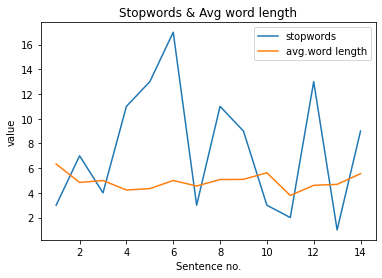

In [ ]:
avgword_vs_stopwords(stack_over2)

In [ ]:
print('No. of numerical words in each sentence: ')
find_digs(stack_over2)

No. of numerical words in each sentence: 
Sentence  13  No. of numerical data:  1
['2021']
Sentence  14  No. of numerical data:  4
['2021', '10', '22', '40552']


In [ ]:
print('Capitalised / Uppercase words')
uppercase(stack_over2)

Capitalised / Uppercase words
UPPERCASE
Sentence 2: Q&A
Sentence 5: I
Sentence 5: I
Sentence 5: BS?
Sentence 12: RSS
Sentence 12: URL
Sentence 12: RSS
CAPITALISED
Sentence 1: Find
Sentence 2: Teams
Sentence 2: Connect
Sentence 3: I'm
Sentence 4: It
Sentence 5: Example
Sentence 5: Link:
Sentence 5: Python
Sentence 5: Code:
Sentence 5: Error
Sentence 5: Message:
Sentence 6: To
Sentence 6: The
Sentence 6: True
Sentence 7: This
Sentence 8: You
Sentence 9: To
Sentence 9: Element
Sentence 10: Thanks
Sentence 10: Stack
Sentence 10: Overflow!
Sentence 11: But
Sentence 11: To
Sentence 12: Required,
Sentence 12: Required,
Sentence 12: By
Sentence 12: Your
Sentence 12: Answer”,
Sentence 12: To
Sentence 13: Stack
Sentence 13: Exchange
Sentence 13: Inc;
Sentence 14: Your
Sentence 14: By
Sentence 14: Stack
Sentence 14: Exchange
Sentence 14: Cookie
Sentence 14: Policy
